## Import Necessary Libraries

In [2]:
#import libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Data Loading, Exploration and Preprocessing

In [3]:
#load train data
#train_df = pd.read_csv("../Datasets/train.csv")
url = "https://raw.githubusercontent.com/sleekyucee/programming4AI/main/Datasets/train.csv"
train_df = pd.read_csv(url)

In [4]:
#check shape of train data
train_df.shape
print(f"The train data contains {train_df.shape[0]} rows and {train_df.shape[1]} columns.")

The train data contains 103904 rows and 25 columns.


In [5]:
#display first 5 rows
train_df[:5]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
#display 10 random rows
train_df.sample(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
34406,34406,24466,Female,Loyal Customer,38,Business travel,Business,516,2,2,...,5,5,5,5,3,5,1,0,0.0,satisfied
30925,30925,28590,Female,Loyal Customer,25,Personal Travel,Eco,2607,0,2,...,2,4,3,3,1,4,2,0,0.0,satisfied
85628,85628,116944,Male,Loyal Customer,56,Business travel,Business,304,1,1,...,4,4,4,4,5,4,3,14,26.0,satisfied
96632,96632,41987,Male,Loyal Customer,60,Personal Travel,Business,106,4,4,...,2,2,4,4,3,2,3,0,0.0,satisfied
25982,25982,49556,Female,Loyal Customer,39,Business travel,Business,3177,3,3,...,5,5,4,5,3,5,4,0,0.0,satisfied
30760,30760,34773,Female,Loyal Customer,43,Business travel,Business,264,1,2,...,1,1,1,1,3,1,3,0,0.0,neutral or dissatisfied
53293,53293,52981,Male,Loyal Customer,25,Business travel,Business,2012,3,5,...,3,2,1,2,1,3,3,0,13.0,neutral or dissatisfied
88895,88895,129025,Male,Loyal Customer,29,Personal Travel,Eco,2611,3,2,...,1,3,3,3,3,2,3,0,0.0,neutral or dissatisfied
67107,67107,97850,Female,Loyal Customer,56,Business travel,Business,1848,4,4,...,3,3,3,3,5,3,3,55,61.0,satisfied
30835,30835,122452,Male,disloyal Customer,22,Business travel,Business,808,0,5,...,3,3,4,4,3,5,3,0,7.0,satisfied


In [7]:
#display column names
train_df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
#the unnamed column look like they have the same values as the index, check count
if train_df["Unnamed: 0"].count()  == train_df["Unnamed: 0"].nunique():
    print(f"The Unnamed column contains {train_df['Unnamed: 0'].nunique()} unique values.")

The Unnamed column contains 103904 unique values.


In [9]:
#set unnamed column as new index
train_df = train_df.set_index("Unnamed: 0")

#rename index
train_df.index.name = "Index"

In [10]:
#view changes
train_df.head(2)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Index,,,,,,,,,,,,,,,,,,,,,
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [11]:
#replace spaces in column names with underscore _
string = {" ": "_"}
train_df.columns = train_df.columns.str.replace(" ", "_", regex=True)

In [12]:
#capitalize column names
train_df.columns = train_df.columns.str.title()

In [13]:
#view changes
train_df.columns

Index(['Id', 'Gender', 'Customer_Type', 'Age', 'Type_Of_Travel', 'Class',
       'Flight_Distance', 'Inflight_Wifi_Service',
       'Departure/Arrival_Time_Convenient', 'Ease_Of_Online_Booking',
       'Gate_Location', 'Food_And_Drink', 'Online_Boarding', 'Seat_Comfort',
       'Inflight_Entertainment', 'On-Board_Service', 'Leg_Room_Service',
       'Baggage_Handling', 'Checkin_Service', 'Inflight_Service',
       'Cleanliness', 'Departure_Delay_In_Minutes', 'Arrival_Delay_In_Minutes',
       'Satisfaction'],
      dtype='object')

In [14]:
#check info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer_Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type_Of_Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight_Distance                    103904 non-null  int64  
 7   Inflight_Wifi_Service              103904 non-null  int64  
 8   Departure/Arrival_Time_Convenient  103904 non-null  int64  
 9   Ease_Of_Online_Booking             103904 non-null  int64  
 10  Gate_Location                      103904 non-null  int64  
 11  Food_And_Drink                     103904 no

In [15]:
#check for missing values in train data
train_df.isnull().sum()

,0
Id,0
Gender,0
Customer_Type,0
Age,0
Type_Of_Travel,0
Class,0
Flight_Distance,0
Inflight_Wifi_Service,0
Departure/Arrival_Time_Convenient,0
Ease_Of_Online_Booking,0


In [16]:
#view first 5 rows of the column with missing values
train_df["Arrival_Delay_In_Minutes"].head()

,Arrival_Delay_In_Minutes
Index,
0,18.0
1,6.0
2,0.0
3,9.0
4,0.0


In [17]:
#fill missing values in the column with the mean
train_df["Arrival_Delay_In_Minutes"] = train_df["Arrival_Delay_In_Minutes"].fillna(train_df["Arrival_Delay_In_Minutes"].mean())

In [18]:
#confirm missing values have been filled
train_df["Arrival_Delay_In_Minutes"].isnull().sum()

0

In [19]:
train_df.dtypes

,0
Id,int64
Gender,object
Customer_Type,object
Age,int64
Type_Of_Travel,object
Class,object
Flight_Distance,int64
Inflight_Wifi_Service,int64
Departure/Arrival_Time_Convenient,int64
Ease_Of_Online_Booking,int64


In [20]:
train_df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [21]:
train_df.Gender = train_df["Gender"].map({"Male": 0, "Female": 1})

In [22]:
train_df.Gender.sample(4)

,Gender
Index,
10505,0
63636,0
97047,0
8445,0


In [23]:
train_df.Customer_Type.unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [24]:
train_df.Customer_Type = train_df.Customer_Type.map({"Loyal Customer": 0, "disloyal Customer": 1})
train_df.Customer_Type.unique()

array([0, 1])

In [25]:
train_df.Type_Of_Travel.unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [26]:
train_df.Type_Of_Travel = train_df.Type_Of_Travel.map({"Personal Travel": 0, "Business travel": 1})
train_df.Type_Of_Travel.unique()

array([0, 1])

In [27]:
train_df.Class.unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [28]:
train_df.Class = train_df.Class.map({"Eco Plus": 0, "Business": 1, "Eco": 2})
train_df.Class.unique()

array([0, 1, 2])

In [29]:
train_df.Satisfaction.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [30]:
train_df.Satisfaction = train_df.Satisfaction.map({"neutral or dissatisfied": 0, "satisfied": 1})
train_df.Satisfaction.unique()

array([0, 1])

In [31]:
train_df.head()

,Id,Gender,Customer_Type,Age,Type_Of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure/Arrival_Time_Convenient,Ease_Of_Online_Booking,...,Inflight_Entertainment,On-Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_In_Minutes,Arrival_Delay_In_Minutes,Satisfaction
Index,,,,,,,,,,,,,,,,,,,,,
0,70172,0,0,13,0,0,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,0,1,25,1,1,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,1,0,26,1,1,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,1,0,25,1,1,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,0,0,61,1,1,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [32]:
X = train_df.drop("Satisfaction", axis=1)
y = train_df["Satisfaction"]

In [33]:
X = np.array(X)

In [34]:
X

array([[7.01720e+04, 0.00000e+00, 0.00000e+00, ..., 5.00000e+00,
        2.50000e+01, 1.80000e+01],
       [5.04700e+03, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 6.00000e+00],
       [1.10028e+05, 1.00000e+00, 0.00000e+00, ..., 5.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [6.88250e+04, 0.00000e+00, 1.00000e+00, ..., 4.00000e+00,
        7.00000e+00, 1.40000e+01],
       [5.41730e+04, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.25670e+04, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [35]:
X.ndim

2

In [36]:
y = np.array(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [37]:
split = int(0.9 * len(y))

X_train, X_val = np.split(X, [split])
y_train, y_val = np.split(y, [split])

In [38]:
#scale features
#calculate mean and std for train features
#train_mean = X_train.mean(axis=0)
#train_std = X_train.std(axis=0)

#scale train data
#X_train = (X_train - train_mean) / train_std

#scale the val features with train features' mean and std
#X_val = (X_val - train_mean) / train_std

In [39]:
#calculate mean and std dev from X_train
X_mean = np.mean(X_train, axis=0, keepdims=True)
X_std = np.std(X_train, axis=0, keepdims=True)

#standardize X_train
X_train = (X_train - X_mean) / (X_std + 1e-8)

#standardize X_val using the same mean and std dev as X_train
X_val = (X_val - X_mean) / (X_std + 1e-8)

In [41]:
#display scaled X_train
X_train

array([[ 0.13990071, -1.01602998, -0.47397188, ...,  1.30496693,
         0.26672785,  0.0734888 ],
       [-1.599155  , -1.01602998,  2.1098297 , ..., -1.74385471,
        -0.36046704, -0.23661446],
       [ 1.20418945,  0.98422289, -0.47397188, ...,  1.30496693,
        -0.38660016, -0.39166609],
       ...,
       [-0.15850923,  0.98422289, -0.47397188, ...,  1.30496693,
         8.55092695,  7.95527994],
       [-1.36240309,  0.98422289, -0.47397188, ..., -0.9816493 ,
        -0.38660016, -0.39166609],
       [ 0.39064517, -1.01602998, -0.47397188, ...,  1.30496693,
         0.58032529,  0.40943399]])

In [42]:
#display scaled X_val
X_val

array([[ 0.64891998,  0.98422289, -0.47397188, ..., -0.21944389,
        -0.38660016, -0.39166609],
       [ 1.26424529,  0.98422289, -0.47397188, ...,  1.30496693,
        -0.38660016, -0.39166609],
       [-1.30248077, -1.01602998,  2.1098297 , ..., -0.9816493 ,
         1.7563157 ,  1.33974377],
       ...,
       [ 0.1039313 , -1.01602998,  2.1098297 , ...,  0.54276152,
        -0.20366831, -0.02987896],
       [-0.28732619,  0.98422289,  2.1098297 , ..., -1.74385471,
        -0.38660016, -0.39166609],
       [-0.06317827, -1.01602998, -0.47397188, ..., -1.74385471,
        -0.38660016, -0.39166609]])

In [43]:
#check mean to be sure scaling have been applied correctly (approx 0)
print("X_train standardized mean:", np.mean(X_train))
print("X_val standardized mean:", np.mean(X_val))

X_train standardized mean: -1.2481084730380005e-17
X_val standardized mean: -0.0019172796662438821


In [44]:
#check std to be sure scaling have been applied correctly (approx 1)
print("X_train standardized std:", np.std(X_train))
print("X_val standardized std:", np.std(X_val))

X_train standardized std: 0.9999999916606014
X_val standardized std: 0.998346571552884


In [45]:
#transpose X
X_train = X_train.T
X_val = X_val.T

#reshape y
y_train = y_train.reshape(1, -1)
y_val = y_val.reshape(1, -1)

In [46]:
display(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(23, 93513)

(23, 10391)

(1, 93513)

(1, 10391)

## Activation Functions

### Sigmoid Function

Here we define the forward and backward pass for sigmoid

In [47]:
def sigmoid_forward(x):
    sig_forward = 1/(1 + np.exp(-x))

    return sig_forward

def sigmoid_backward(sig_forward):
    sig_derivative = sig_forward * (1 - sig_forward)

    return sig_derivative

In [93]:
#test sigmoid forward
sig_forward = sigmoid_forward(X_train)
print(sig_forward)

[[0.53491824 0.16809975 0.76926923 ... 0.46045545 0.20385001 0.596438  ]
 [0.26580143 0.26580143 0.72794533 ... 0.72794533 0.72794533 0.26580143]
 [0.38367658 0.89185491 0.38367658 ... 0.38367658 0.38367658 0.38367658]
 ...
 [0.78666972 0.14882397 0.78666972 ... 0.78666972 0.27256465 0.78666972]
 [0.56628942 0.41084651 0.40453601 ... 0.99980667 0.40453601 0.64114225]
 [0.51836394 0.44112083 0.40331629 ... 0.99964932 0.40331629 0.60095215]]


In [94]:
#test sigmoid backward
sig_derivative = sigmoid_backward(sig_forward)
print(sig_derivative)

[[2.48780716e-01 1.39842223e-01 1.77494084e-01 ... 2.48436229e-01
  1.62295186e-01 2.40699712e-01]
 [1.95151030e-01 1.95151030e-01 1.98040927e-01 ... 1.98040927e-01
  1.98040927e-01 1.95151030e-01]
 [2.36468862e-01 9.64497261e-02 2.36468862e-01 ... 2.36468862e-01
  2.36468862e-01 2.36468862e-01]
 ...
 [1.67820469e-01 1.26675399e-01 1.67820469e-01 ... 1.67820469e-01
  1.98273161e-01 1.67820469e-01]
 [2.45605713e-01 2.42051656e-01 2.40886627e-01 ... 1.93291018e-04
  2.40886627e-01 2.30078865e-01]
 [2.49662766e-01 2.46533244e-01 2.40652260e-01 ... 3.50559037e-04
  2.40652260e-01 2.39808663e-01]]


### ReLu Function

Here we define the forward and backward pass for relu

In [48]:
def relu_forward(x):
    rel_forward = np.maximum(0, x)

    return rel_forward

def relu_backward(x):
    rel_derivative = np.where(x > 0, 1, 0)

    return rel_derivative

In [95]:
#test relu forward
rel_forward = relu_forward(X_train)
print(rel_forward)

[[0.13990071 0.         1.20418945 ... 0.         0.         0.39064517]
 [0.         0.         0.98422291 ... 0.98422291 0.98422291 0.        ]
 [0.         2.10982976 0.         ... 0.         0.         0.        ]
 ...
 [1.30496694 0.         1.30496694 ... 1.30496694 0.         1.30496694]
 [0.26672785 0.         0.         ... 8.55092695 0.         0.58032529]
 [0.0734888  0.         0.         ... 7.95527994 0.         0.40943399]]


In [96]:
#test relu backward
rel_derivative = relu_backward(rel_forward)
print(rel_derivative)

[[1 0 1 ... 0 0 1]
 [0 0 1 ... 1 1 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]]


### Softmax Function

Here we define the forward and backward pass for softmax

In [49]:
def softmax_forward(x):
    #subtract max from x for numerical stability
    #x_max = np.max(x, axis=0, keepdims=True)
    #x = x - max_x

    # Clip values to a reasonable range to prevent overflows
    #x = np.clip(x, -10, 10)  # Adjust the clipping range if needed
    x -= np.max(x, axis=0, keepdims=True)
    exp_x_i = np.exp(x)
    sum_exp_x_j = np.sum(exp_x_i, axis=0, keepdims=True)
    soft_forward = exp_x_i/sum_exp_x_j
    return soft_forward

def softmax_backward(x):
    """
    Compute the Jacobian matrices for a batch of inputs for the softmax function.

    Parameters:
    batch_x (numpy.ndarray): Input array of shape (n_classes, n_samples)

    Returns:
    numpy.ndarray: Jacobian matrices of shape (n_samples, n_classes, n_classes)
    """
    n, m = x.shape
    jacobians = np.zeros((m, n, n))  # Shape: (n_samples, n_classes, n_classes)

    for sample_idx in range(m):
        # Extract softmax probabilities for a single sample
        y = x[:, sample_idx]  # Shape: (n_classes,)

        # Compute the Jacobian matrix for this sample
        jacobian = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                if i == j:
                    jacobian[i, j] = y[i] * (1 - y[i])  # Diagonal case
                else:
                    jacobian[i, j] = -y[i] * y[j]  # Off-diagonal case

        # Store the Jacobian matrix
        jacobians[sample_idx] = jacobian

    return jacobians


In [139]:
z = [2.0, 1.0, 0.1]
soft_forward = softmax_forward(z)
print(soft_forward)

[0.65900114 0.24243297 0.09856589]


In [140]:
z = np.array([2.0, 1.0, 0.1]).reshape(-1, 1)
jacobian = softmax_backward(z)
print(jacobian)

[[[-2.   -2.   -0.2 ]
  [-2.    0.   -0.1 ]
  [-0.2  -0.1   0.09]]]


In [100]:
#test softmax forward
soft_forward = softmax_forward(X_train)
print(soft_forward)

[[3.41280536e-02 8.15159385e-03 8.61522899e-02 ... 1.05872720e-04
  6.89585697e-03 2.62378525e-02]
 [1.07422979e-02 1.46046281e-02 6.91411453e-02 ... 3.31945154e-04
  7.20634364e-02 6.42712908e-03]
 [1.84718348e-02 3.32685708e-01 1.60860944e-02 ... 7.72289938e-05
  1.67659826e-02 1.10517198e-02]
 ...
 [1.09419155e-01 7.05342805e-03 9.52870613e-02 ... 4.57471135e-04
  1.00913092e-02 6.54656050e-02]
 [3.87428750e-02 2.81318232e-02 1.75547915e-02 ... 6.41570139e-01
  1.82967551e-02 3.17179650e-02]
 [3.19351670e-02 3.18409758e-02 1.74660850e-02 ... 3.53637193e-01
  1.82042993e-02 2.67354912e-02]]


In [101]:
#test softmax backward
jacobian = softmax_backward(X_train)
print(jacobian)

[[[ 1.20328503e-01  1.42143320e-01  6.63090050e-02 ... -1.82565804e-01
   -3.73154160e-02 -1.02811350e-02]
  [ 1.42143320e-01 -2.04834695e+00 -4.81569659e-01 ...  1.32588556e+00
    2.71003496e-01  7.46668218e-02]
  [ 6.63090050e-02 -4.81569659e-01 -6.98621245e-01 ...  6.18517650e-01
    1.26421503e-01  3.48316239e-02]
  ...
  [-1.82565804e-01  1.32588556e+00  6.18517650e-01 ... -3.97971780e-01
   -3.48071026e-01 -9.59004503e-02]
  [-3.73154160e-02  2.71003496e-01  1.26421503e-01 ... -3.48071026e-01
    1.95584104e-01 -1.96015087e-02]
  [-1.02811350e-02  7.46668218e-02  3.48316239e-02 ... -9.59004503e-02
   -1.96015087e-02  6.80881934e-02]]

 [[-4.15645169e+00 -1.62478944e+00  3.37394479e+00 ... -2.78869399e+00
   -5.76442660e-01 -3.78383198e-01]
  [-1.62478944e+00 -2.04834695e+00  2.14365032e+00 ... -1.77180871e+00
   -3.66245321e-01 -2.40407391e-01]
  [ 3.37394479e+00  2.14365032e+00 -2.34155185e+00 ...  3.67923658e+00
    7.60524077e-01  4.99216232e-01]
  ...
  [-2.78869399e+00 -1.7

### Drop Out

In [50]:
#implement inverted drop out
#forward pass
def inverted_dropout_forward(x, p, activation_function):
    #set keep probability
    if not 0 < p <= 1:
        raise ValueError("Probability p must be between 0 and 1.")

    h = activation_function(x)

    #create mask
    mask = (np.random.rand(*h.shape) < p) / p

    #apply mask
    h = h * mask

    return h, mask

#backward pass
def inverted_dropout_backward(dh, mask):
    dx = dh * mask

    return dx

In [107]:
#test inverted dropout forward
h, mask = inverted_dropout_forward(X_train, 0.8, relu_forward)
print(h)

[[0.17487589 0.         1.50523682 ... 0.         0.         0.48830647]
 [0.         0.         1.23027864 ... 1.23027864 0.         0.        ]
 [0.         2.6372872  0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         1.63120868 ... 1.63120868 0.         1.63120868]
 [0.33340981 0.         0.         ... 0.         0.         0.72540661]
 [0.091861   0.         0.         ... 9.94409993 0.         0.51179249]]


In [108]:
#test inverted dropout backward
dx = inverted_dropout_backward(h, mask)
print(dx)

[[ 0.21859486  0.          1.88154602 ...  0.          0.
   0.61038308]
 [ 0.          0.          1.5378483  ...  1.5378483   0.
   0.        ]
 [ 0.          3.29660899  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          2.03901085 ...  2.03901085  0.
   2.03901085]
 [ 0.41676226  0.          0.         ...  0.          0.
   0.90675827]
 [ 0.11482624  0.          0.         ... 12.43012491  0.
   0.63974061]]


## Fully Connected Neural Network Class

In [128]:
class NeuralNetwork:
      def __init__(self, layer_dims, activations, dropout_probs=1.0, regularizer=None, reg_lambda=0.001):
          """
          Initialize the neural network.

          Parameters:
              layer_dims (list): List of layer sizes, e.g., [input_dim, hidden1, ..., output_dim].
              activations (list): Activation functions for each layer (e.g., ['relu', 'relu', 'softmax']).
              dropout_probs (list): Dropout keep probabilities for each layer (e.g., [1.0, 0.8, 1.0]).
              regularizer (str): Regularization type ('L1', 'L2', or None).
              reg_lambda (float): Regularization strength.
          """
          assert len(layer_dims) == len(activations) + 1, "Number of activations must match the number of layers minus one."
          assert all(0 < p <= 1.0 for p in dropout_probs), "Dropout probabilities must be in the range (0, 1]."

          self.layer_dims = layer_dims
          self.activations = activations
          self.dropout_probs = dropout_probs or [1.0] * len(layer_dims)
          self.regularizer = regularizer
          self.reg_lambda = reg_lambda
          self.params = self._initialize_weights()

      def _initialize_weights(self):
          params = {}
          for l in range(1, len(self.layer_dims)):
              params[f"W{l}"] = np.random.randn(self.layer_dims[l], self.layer_dims[l - 1]) * 0.01
              params[f"b{l}"] = np.zeros((self.layer_dims[l], 1))
          return params


      def forward(self, X):
          """
          Perform the forward pass.
          :param X: Input data.
          :return: Activations and intermediate values.
          """
          activations = [X]
          caches = []
          A = X

          for i in range(1, len(self.layer_dims)):
              W, b = self.params[f"W{i}"], self.params[f"b{i}"]

              # Debug print shapes
              #print(f"Layer {i}:")
              #print(f"W{i}.shape = {W.shape}, A.shape = {A.shape}")

              assert W.shape == (self.layer_dims[i], self.layer_dims[i - 1]), \
              f"W{i} has incorrect shape. Expected ({self.layer_dims[i]}, {self.layer_dims[i - 1]}), got {W.shape}"
              assert b.shape == (self.layer_dims[i], 1), \
              f"b{i} has incorrect shape. Expected ({self.layer_dims[i]}, 1), got {b.shape}"

              # Update A to be the output of the previous layer
              A = activations[-1]

              #compute pre-activation
              Z = np.dot(W, A) + b

              #select activation function
              if self.activations[i - 1] == "sigmoid":
                  activation_function = sigmoid_forward

              elif self.activations[i - 1] == "relu":
                  activation_function = relu_forward

              elif self.activations[i - 1] == "softmax":
                  activation_function = softmax_forward

              else:
                  raise ValueError("Unsupported activation function.")

              #apply dropout if needed
              if self.dropout_probs[i - 1] < 1.0:
                  A, mask = inverted_dropout_forward(Z, self.dropout_probs[i - 1], activation_function)
                  caches.append((Z, mask))

              else:
                  #update A to be the output of the current layer
                  A = activation_function(Z)
                  caches.append(Z)

              #store activations
              activations.append(A)

          return A, activations, caches

      def backward(self, X, Y, activations, caches):
          """
          Perform the backward pass.
          :param X: Input data.
          :param Y: True labels.
          :param activations: Forward pass activations.
          :param caches: Forward pass caches.
          :return: Gradients for weights and biases.
          """
          grads = {}
          m = X.shape[1]
          assert Y.shape[1] == m, f"Mismatch in number of samples between X and Y. X.shape[1]={X.shape[1]}, Y.shape[1]={Y.shape[1]}"

          dA = activations[-1] - Y  # Assuming cross-entropy loss for softmax output
          for i in reversed(range(1, len(self.layer_dims))):

              #extract Z (and mask if dropout is applied)
              cache = caches[i - 1]
              if isinstance(cache, tuple):  # Dropout was applied
                  Z, mask = cache
                  dA = dA * mask  # Apply dropout mask to backpropagated gradient
              else:
                  Z = cache

              # Compute dZ based on activation function
              if self.activations[i - 1] == "sigmoid":
                  dZ = dA * sigmoid_backward(Z)
              elif self.activations[i - 1] == "relu":
                  dZ = dA * relu_backward(Z)
              elif self.activations[i - 1] == "softmax":
                  dZ = dA
              else:
                  raise ValueError("Unsupported activation function.")

              # Compute gradients for weights and biases
              dW = (1 / m) * np.dot(dZ, activations[i - 1].T)
              db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)

              # Apply regularization if needed
              if self.regularizer == "L2":
                  dW += (self.reg_lambda / m) * self.params[f"W{i}"]
              elif self.regularizer == "L1":
                  dW += (self.reg_lambda / m) * np.sign(self.params[f"W{i}"])

              # Store gradients
              grads[f"dW{i}"] = dW
              grads[f"db{i}"] = db

              # Compute dA for the next layer
              dA = np.dot(self.params[f"W{i}"].T, dZ)

          return grads


      def compute_loss(self, Y, Y_pred, output_activation="softmax"):
          """
          Compute loss with optional regularization, handling both softmax and sigmoid output layers.

          Parameters:
              Y (ndarray): True labels (shape: [num_classes, m] for softmax, [1, m] for sigmoid).
              Y_pred (ndarray): Predicted probabilities (same shape as Y).
              output_activation (str): The activation function of the output layer ("softmax" or "sigmoid").

          Returns:
              float: The computed loss (cross-entropy + optional regularization).
          """
          m = Y.shape[1]
          assert Y_pred.shape == Y.shape, f"Y_pred shape mismatch: expected {Y.shape}, got {Y_pred.shape}"

          if output_activation == "softmax":
              # Categorical cross-entropy loss for softmax output
              cross_entropy_loss = -np.sum(Y * np.log(Y_pred + 1e-8)) / m
          elif output_activation == "sigmoid":
              # Binary cross-entropy loss for sigmoid output
              cross_entropy_loss = -np.sum(
                  Y * np.log(Y_pred + 1e-8) + (1 - Y) * np.log(1 - Y_pred + 1e-8)
              ) / m
          else:
              raise ValueError("Unsupported output activation function. Use 'softmax' or 'sigmoid'.")

          # Add regularization if needed
          if self.regularizer == "L2":
              reg_loss = (self.reg_lambda / (2 * m)) * sum(
                  [np.sum(np.square(self.params[f"W{i}"])) for i in range(1, len(self.layer_dims))]
              )
          elif self.regularizer == "L1":
              reg_loss = (self.reg_lambda / m) * sum(
                  [np.sum(np.abs(self.params[f"W{i}"])) for i in range(1, len(self.layer_dims))]
              )
          else:
              reg_loss = 0

          return cross_entropy_loss + reg_loss


      def update_weights(self, learning_rate, grads):
          """
          Update parameters using gradients with gradient clipping.
          """
          clip_threshold = 2  # Experiment with different values (e.g., 1, 2, 3, 5, 10)

          for i in range(1, len(self.layer_dims)):
              # Gradient clipping
              for grad_key in [f"dW{i}", f"db{i}"]:
                  grad = grads[grad_key]
                  grad_norm = np.linalg.norm(grad)
                  if grad_norm > clip_threshold:
                      grad *= (clip_threshold / grad_norm)

              self.params[f"W{i}"] -= learning_rate * grads[f"dW{i}"]
              self.params[f"b{i}"] -= learning_rate * grads[f"db{i}"]

      def train(self, X_train, Y_train, X_val, Y_val, epochs, batch_size, learning_rate, decay_rate=0.0):
          """
          Train the neural network with optional learning rate decay.

          Parameters:
              X_train (ndarray): Training input data.
              Y_train (ndarray): Training labels.
              X_val (ndarray): Validation input data.
              Y_val (ndarray): Validation labels.
              epochs (int): Number of training epochs.
              batch_size (int): Batch size for mini-batch training.
              learning_rate (float): Initial learning rate.
              decay_rate (float): Decay rate for learning rate (default 0.0, no decay).

          Returns:
              history (dict): A dictionary containing training and validation losses.
          """
          m = X_train.shape[1]  # Number of training examples
          history = {'train_loss': [], 'val_loss': []}

          for epoch in range(epochs):
              # Shuffle training data
              perm = np.random.permutation(m)
              X_train, Y_train = X_train[:, perm], Y_train[:, perm]

              epoch_loss = 0
              for i in range(0, m, batch_size):
                  X_batch = X_train[:, i:i+batch_size]
                  Y_batch = Y_train[:, i:i+batch_size]

                  # Forward pass
                  Y_pred, activations, caches = self.forward(X_batch)

                  # Compute loss
                  # Assume self.activations[-1] specifies the output layer activation
                  loss = self.compute_loss(Y, Y_pred, output_activation=self.activations[-1])

                  #loss = self.compute_loss(Y_batch, Y_pred)
                  epoch_loss += loss

                  # Backward pass
                  grads = self.backward(X_batch, Y_batch, activations, caches)

                  # Update weights
                  self.update_weights(learning_rate, grads)

              # Average epoch loss
              epoch_loss /= (m // batch_size)
              history['train_loss'].append(epoch_loss)

              # Validation loss
              Y_val_pred, _, _ = self.forward(X_val)
              val_loss = self.compute_loss(Y_val, Y_val_pred)
              history['val_loss'].append(val_loss)

              # Adjust learning rate with decay
              if decay_rate > 0.0:
                  learning_rate = learning_rate * (1 / (1 + decay_rate * epoch))

              # Print progress
              if epoch % 1 == 0:  # Print every epoch
                  print(f"Epoch: {epoch+1}/{epochs}, "
                        f"Train Loss: {epoch_loss:.4f}, "
                        f"Val Loss: {val_loss:.4f}, "
                        f"Learning Rate: {learning_rate:.6f}")

          return history

      def predict(self, X):
          """
          Predict output for the given input data.
          """
          Y_pred, _, _ = self.forward(X)
          return np.argmax(Y_pred, axis=0)


In [58]:
class NeuralNetwork:
    def __init__(self, layer_dims, activations, dropout_probs=1.0, regularizer=None, reg_lambda=0.001):
        """
        Initialize the neural network.

        Parameters:
            layer_dims (list): List of layer sizes, e.g., [input_dim, hidden1, ..., output_dim].
            activations (list): Activation functions for each layer (e.g., ['relu', 'relu', 'softmax']).
            dropout_probs (list): Dropout keep probabilities for each layer (e.g., [1.0, 0.8, 1.0]).
            regularizer (str): Regularization type ('L1', 'L2', or None).
            reg_lambda (float): Regularization strength.
        """
        assert len(layer_dims) == len(activations) + 1, "Number of activations must match the number of layers minus one."
        assert all(0 < p <= 1.0 for p in dropout_probs), "Dropout probabilities must be in the range (0, 1]."

        self.layer_dims = layer_dims
        self.activations = activations
        self.dropout_probs = dropout_probs or [1.0] * len(layer_dims)
        self.regularizer = regularizer
        self.reg_lambda = reg_lambda
        self.params = self._initialize_weights()

    def _initialize_weights(self):
        params = {}
        for l in range(1, len(self.layer_dims)):
            params[f"W{l}"] = np.random.randn(self.layer_dims[l], self.layer_dims[l - 1]) * np.sqrt(2 / self.layer_dims[l - 1])
            params[f"b{l}"] = np.zeros((self.layer_dims[l], 1))
        return params


    #def _initialize_weights(self):
     #   params = {}
      #  for l in range(1, len(self.layer_dims)):
       #     if self.activations[l - 1] == "relu":
        #        params[f"W{l}"] = np.random.randn(self.layer_dims[l], self.layer_dims[l - 1]) * np.sqrt(2 / self.layer_dims[l - 1])
         #   elif self.activations[l - 1] == "sigmoid":
          #      params[f"W{l}"] = np.random.randn(self.layer_dims[l], self.layer_dims[l - 1]) * np.sqrt(1 / self.layer_dims[l - 1])
           # else:
            #    params[f"W{l}"] = np.random.randn(self.layer_dims[l], self.layer_dims[l - 1]) * 0.01  # Default small random
            #params[f"b{l}"] = np.zeros((self.layer_dims[l], 1))
        #return params

    def forward(self, X):
        """
        Perform the forward pass.
        """
        activations = [X]
        caches = []
        A = X

        for i in range(1, len(self.layer_dims)):
            W, b = self.params[f"W{i}"], self.params[f"b{i}"]
            Z = np.dot(W, A) + b

            if self.activations[i - 1] == "sigmoid":
                activation_function = sigmoid_forward
            elif self.activations[i - 1] == "relu":
                activation_function = relu_forward
            elif self.activations[i - 1] == "softmax":
                activation_function = softmax_forward
            else:
                raise ValueError("Unsupported activation function.")

            if self.dropout_probs[i - 1] < 1.0:
                A, mask = inverted_dropout_forward(Z, self.dropout_probs[i - 1], activation_function)
                caches.append((Z, mask))
            else:
                A = activation_function(Z)
                caches.append(Z)

            activations.append(A)
            if self.activations[i - 1] == "softmax":
                assert np.allclose(np.sum(A, axis=0), 1, atol=1e-6), "Softmax outputs do not sum to 1."

        return A, activations, caches

    def backward(self, X, Y, activations, caches):
        """
        Perform the backward pass.
        """
        grads = {}
        m = X.shape[1]
        assert Y.shape[1] == m, f"Mismatch in number of samples between X and Y. X.shape[1]={X.shape[1]}, Y.shape[1]={Y.shape[1]}"

        dA = activations[-1] - Y  # Assuming cross-entropy loss for softmax output
        for i in reversed(range(1, len(self.layer_dims))):
            cache = caches[i - 1]
            if isinstance(cache, tuple):  # Dropout was applied
                Z, mask = cache
                dA = dA * mask
            else:
                Z = cache

            if self.activations[i - 1] == "sigmoid":
                dZ = dA * sigmoid_backward(Z)
            elif self.activations[i - 1] == "relu":
                dZ = dA * relu_backward(Z)
            elif self.activations[i - 1] == "softmax":
                dZ = dA
            else:
                raise ValueError("Unsupported activation function.")

            dW = (1 / m) * np.dot(dZ, activations[i - 1].T)
            db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)

            if self.regularizer == "L2":
                dW += (self.reg_lambda / m) * self.params[f"W{i}"]
            elif self.regularizer == "L1":
                dW += (self.reg_lambda / m) * np.sign(self.params[f"W{i}"])

            grads[f"dW{i}"] = dW
            grads[f"db{i}"] = db
            dA = np.dot(self.params[f"W{i}"].T, dZ)

        return grads

    def compute_loss(self, Y, Y_pred, output_activation="softmax"):
        """
        Compute loss with optional regularization, handling both softmax and sigmoid output layers.

        Parameters:
            Y (ndarray): True labels (shape: [num_classes, m] for softmax, [1, m] for sigmoid).
            Y_pred (ndarray): Predicted probabilities (same shape as Y).
            output_activation (str): The activation function of the output layer ("softmax" or "sigmoid").

        Returns:
            float: The computed loss (cross-entropy + optional regularization).
        """
        m = Y.shape[1]
        assert Y_pred.shape == Y.shape, f"Y_pred shape mismatch: expected {Y.shape}, got {Y_pred.shape}"

        if output_activation == "softmax":
            # Categorical cross-entropy loss for softmax output
            cross_entropy_loss = -np.sum(Y * np.log(Y_pred + 1e-8)) / m
        elif output_activation == "sigmoid":
            # Binary cross-entropy loss for sigmoid output
            cross_entropy_loss = -np.sum(
                Y * np.log(Y_pred + 1e-8) + (1 - Y) * np.log(1 - Y_pred + 1e-8)
              ) / m
        else:
            raise ValueError("Unsupported output activation function. Use 'softmax' or 'sigmoid'.")

        #Add regularization if needed
        if self.regularizer == "L2":
            reg_loss = (self.reg_lambda / (2 * m)) * sum(
                [np.sum(np.square(self.params[f"W{i}"])) for i in range(1, len(self.layer_dims))]
              )
        elif self.regularizer == "L1":
            reg_loss = (self.reg_lambda / m) * sum(
                [np.sum(np.abs(self.params[f"W{i}"])) for i in range(1, len(self.layer_dims))]
              )
        else:
            reg_loss = 0

        return cross_entropy_loss + reg_loss

    def update_weights(self, learning_rate, grads):
        """
        Update parameters using gradients with gradient clipping.
        """
        clip_threshold = 10

        for i in range(1, len(self.layer_dims)):
            for grad_key in [f"dW{i}", f"db{i}"]:
                grad = grads[grad_key]
                grad_norm = np.linalg.norm(grad)
                if grad_norm > clip_threshold:
                    grad *= (clip_threshold / grad_norm)
            self.params[f"W{i}"] -= learning_rate * grads[f"dW{i}"]
            self.params[f"b{i}"] -= learning_rate * grads[f"db{i}"]

    def train(self, X_train, Y_train, X_val, Y_val, epochs, batch_size, learning_rate, decay_rate=0.0):
        """
        Train the neural network with optional learning rate decay.
        """
        m = X_train.shape[1]
        history = {'train_loss': [], 'val_loss': []}

        for epoch in range(epochs):
            perm = np.random.permutation(m)
            X_train, Y_train = X_train[:, perm], Y_train[:, perm]

            epoch_loss = 0
            for i in range(0, m, batch_size):
                X_batch = X_train[:, i:i+batch_size]
                Y_batch = Y_train[:, i:i+batch_size]

                assert X_batch.shape[1] <= batch_size, f"Batch size mismatch: {X_batch.shape[1]} > {batch_size}"
                assert Y_batch.shape[1] == X_batch.shape[1], "X_batch and Y_batch size mismatch"

                Y_pred, activations, caches = self.forward(X_batch)
                #loss = self.compute_loss(Y_batch, Y_pred)
                # Assume self.activations[-1] specifies the output layer activation
                loss = self.compute_loss(Y_batch, Y_pred, output_activation=self.activations[-1])

                epoch_loss += loss

                grads = self.backward(X_batch, Y_batch, activations, caches)
                self.update_weights(learning_rate, grads)

            epoch_loss /= (m // batch_size)
            history['train_loss'].append(epoch_loss)

            Y_val_pred, _, _ = self.forward(X_val)
            val_loss = self.compute_loss(Y_val, Y_val_pred)
            history['val_loss'].append(val_loss)

            if decay_rate > 0.0:
                learning_rate = learning_rate * np.exp(-decay_rate * epoch)

            print(f"Epoch: {epoch+1}/{epochs}, "
                  f"Train Loss: {epoch_loss:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Learning Rate: {learning_rate:.6f}")

        return history

    def predict(self, X):
        """
        Predict outputs for given inputs.
        """
        Y_pred, _, _ = self.forward(X)
        return Y_pred

### Model One - 2 Hidden Layers

Epoch: 1/50, Train Loss: 1.6086, Val Loss: 2.6017, Learning Rate: 0.000010
Epoch: 2/50, Train Loss: 4.0457, Val Loss: 5.5270, Learning Rate: 0.000010
Epoch: 3/50, Train Loss: 6.7482, Val Loss: 7.5081, Learning Rate: 0.000010
Epoch: 4/50, Train Loss: 7.8266, Val Loss: 7.8886, Learning Rate: 0.000010
Epoch: 5/50, Train Loss: 7.9898, Val Loss: 7.9213, Learning Rate: 0.000010
Epoch: 6/50, Train Loss: 8.0028, Val Loss: 7.9241, Learning Rate: 0.000010
Epoch: 7/50, Train Loss: 8.0039, Val Loss: 7.9242, Learning Rate: 0.000010
Epoch: 8/50, Train Loss: 8.0030, Val Loss: 7.9242, Learning Rate: 0.000009
Epoch: 9/50, Train Loss: 8.0041, Val Loss: 7.9242, Learning Rate: 0.000009
Epoch: 10/50, Train Loss: 8.0032, Val Loss: 7.9242, Learning Rate: 0.000009
Epoch: 11/50, Train Loss: 8.0043, Val Loss: 7.9242, Learning Rate: 0.000009
Epoch: 12/50, Train Loss: 8.0049, Val Loss: 7.9242, Learning Rate: 0.000009
Epoch: 13/50, Train Loss: 8.0040, Val Loss: 7.9242, Learning Rate: 0.000009
Epoch: 14/50, Train L

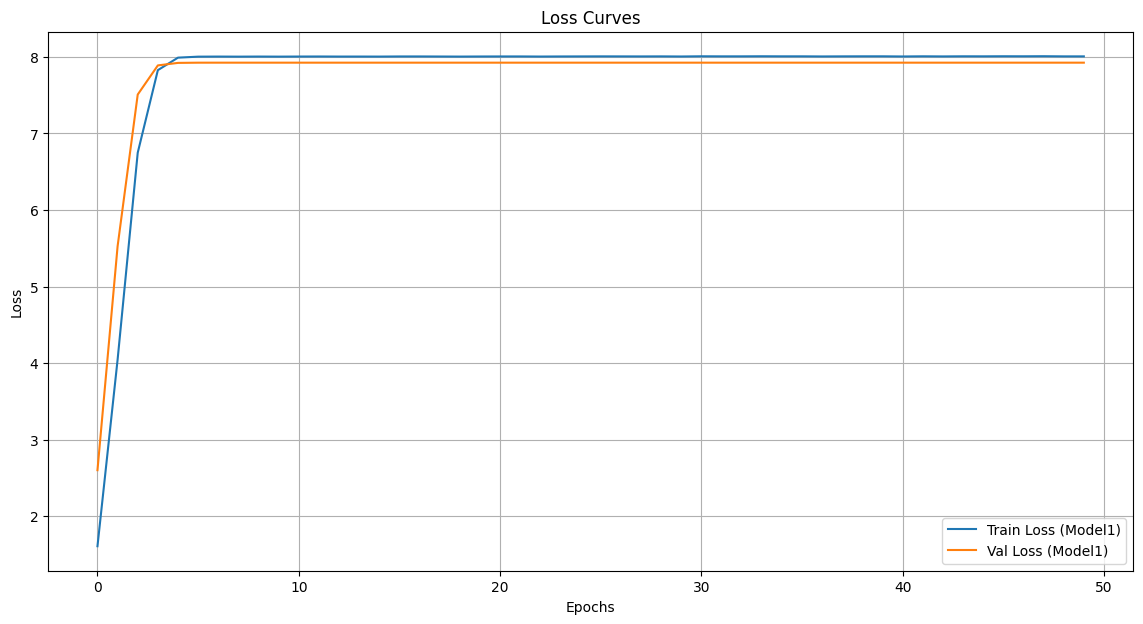

In [64]:
#set up configuration
layer_dims1 = [X_train.shape[0], 256, 128, y_train.shape[0]]  # Input -> 2 Hidden -> Output
activations1 = ["relu", "relu", "sigmoid"]
dropout_probs1 = [1.0, 1.0, 1.0]  # No dropout
regularizer1 = "L2"

#initialize model
model1 = NeuralNetwork(
    layer_dims1,
    activations1,
    dropout_probs1,
    regularizer1,
    reg_lambda=0.001
)

#set epoch and batch size
epochs = 50
batch_size = 32

#train model
history1 = model1.train(
    X_train,
    y_train,
    X_val,
    y_val,
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=0.00001,
    decay_rate=0.002
)

#plot loss curves
plt.figure(figsize=(14, 7))

plt.plot(history1['train_loss'], label="Train Loss (Model1)")
plt.plot(history1['val_loss'], label="Val Loss (Model1)")

plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [204]:
y_train.shape

(1, 93513)

### Model Two - 3 Hidden Layers

In [167]:
batch_size = 64
epochs = 50

Epoch: 1/50, Train Loss: 0.1402, Val Loss: 0.0004, Learning Rate: 0.000100
Epoch: 2/50, Train Loss: 0.1523, Val Loss: 0.0005, Learning Rate: 0.000100
Epoch: 3/50, Train Loss: 0.1739, Val Loss: 0.0006, Learning Rate: 0.000100
Epoch: 4/50, Train Loss: 0.2034, Val Loss: 0.0007, Learning Rate: 0.000099
Epoch: 5/50, Train Loss: 0.2409, Val Loss: 0.0008, Learning Rate: 0.000099
Epoch: 6/50, Train Loss: 0.2862, Val Loss: 0.0010, Learning Rate: 0.000099
Epoch: 7/50, Train Loss: 0.3393, Val Loss: 0.0011, Learning Rate: 0.000098
Epoch: 8/50, Train Loss: 0.4001, Val Loss: 0.0013, Learning Rate: 0.000097
Epoch: 9/50, Train Loss: 0.4684, Val Loss: 0.0016, Learning Rate: 0.000096
Epoch: 10/50, Train Loss: 0.5440, Val Loss: 0.0018, Learning Rate: 0.000096
Epoch: 11/50, Train Loss: 0.6267, Val Loss: 0.0021, Learning Rate: 0.000095
Epoch: 12/50, Train Loss: 0.7162, Val Loss: 0.0023, Learning Rate: 0.000094
Epoch: 13/50, Train Loss: 0.8122, Val Loss: 0.0027, Learning Rate: 0.000092
Epoch: 14/50, Train L

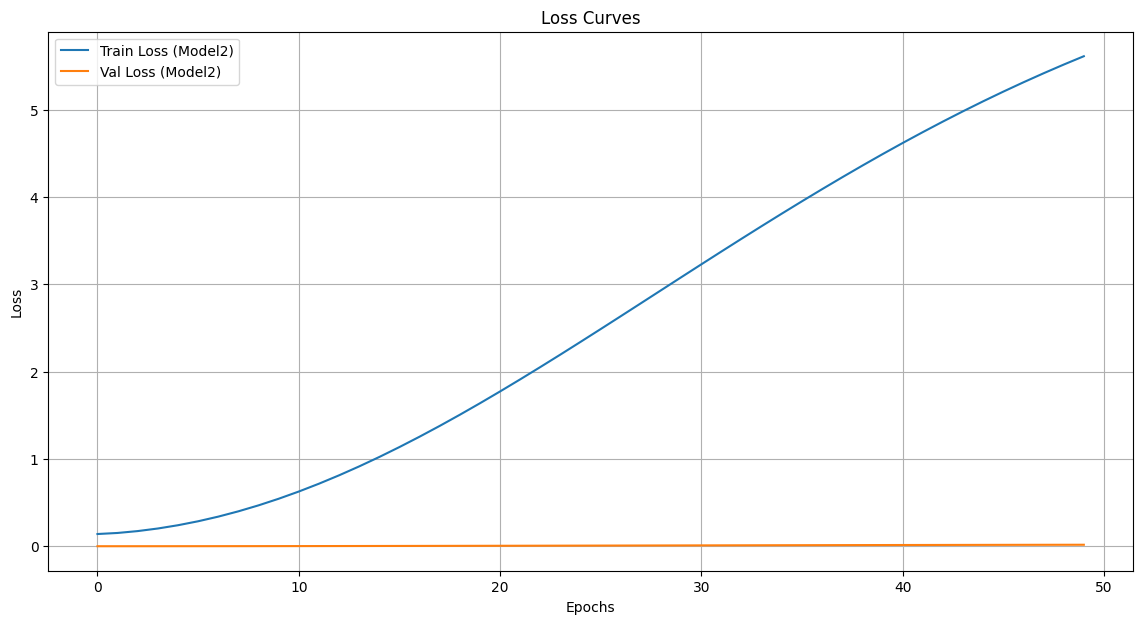

In [66]:
layer_dims2 = [X_train.shape[0], 256, 128, 64, y_train.shape[0]]  # Input -> 3 Hidden -> Output
activations2 = ["relu", "relu", "relu", "softmax"]
dropout_probs2 = [1.0, 0.5, 0.5, 1.0]  # Dropout applied to hidden layers
regularizer2 = "L2"

#initialize model
model2 = NeuralNetwork(layer_dims2, activations2, dropout_probs2, regularizer2, reg_lambda=0.01)

# Train networks
history2 = model2.train(X_train,
                         y_train,
                         X_val,
                         y_val,
                         epochs=epochs,
                         batch_size=batch_size,
                         learning_rate=0.0001,
                         decay_rate=0.001)

# Plot loss curves
plt.figure(figsize=(14, 7))

# Network 2
plt.plot(history2['train_loss'], label="Train Loss (Model2)")
plt.plot(history2['val_loss'], label="Val Loss (Model2)")

plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#make prediction
y_pred = model2.predict(X_val)

In [ ]:
#load test data
test_df = pd.read_csv("../Datasets/test.csv")
test_df.head()

In [ ]:
#inspect shape of test data
test_df.shape
print(f"The test data contains {test_df.shape[0]} rows and {test_df.shape[1]} columns.")

In [ ]:
#display info
test_df.info()

In [ ]:
#get missing values in test data
test_df.isna().sum()

In [ ]:
#view column with missing values
test_df["Arrival Delay in Minutes"].sample(6)

In [ ]:
#fill missing values in column with the mean
test_df["Arrival Delay in Minutes"] = test_df["Arrival Delay in Minutes"].fillna(test_df["Arrival Delay in Minutes"].mean())

In [ ]:
#confirm missing values have been filled
test_df.isnull().sum().sum()

In [ ]:
test_df.columns